In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
center = 112
upper_bound, lower_bound = 224, 0
pad = 10
region_ul, region_ll = 5000, 150
thresh_ul, thresh_ll = 255, 150

In [3]:
def initialPrepare(img):
    blur = cv2.medianBlur(img,5)
    img = cv2.cvtColor(blur,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    _,thresh = cv2.threshold(gray,thresh_ll,thresh_ul,cv2.THRESH_BINARY_INV)
    return thresh

In [4]:
def findDist(x,y):
    X = (center-x)*(center-x)
    Y = (center-y)*(center-y)
    return X+Y

In [5]:
def check(region_size):
    if(region_size>region_ll):
            return True
    return False

In [6]:
def centroid(contour):
    centroidXY = cv2.moments(contour)
    x = int(centroidXY['m10']/centroidXY['m00'])
    y = int(centroidXY['m01']/centroidXY['m00'])
    return x,y

In [7]:
def finalRegion(curr_contour):
    perimeter = cv2.arcLength(curr_contour, True)
    box = cv2.approxPolyDP(curr_contour, 0.02 * perimeter, True)
    x , y , w, h = cv2.boundingRect(box)
    return x, y, w, h

In [8]:
def preprocess(img):
    thresh=initialPrepare(img)
    _,contours,_ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)

    if len(contours)==0:
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        return img,thresh
    max_val,curr_contour = 100000,contours[0]
    for contour in contours:
        region_size = cv2.contourArea(contour)
        ok = check(region_size)
        if(ok):
            x,y = centroid(contour)
            distance = findDist(x,y)
            if distance < max_val:
                curr_contour = contour
                max_val = distance
        print(region_size)  
    x_b ,y_b ,w ,h = finalRegion(curr_contour)
    x_f = max(lower_bound,x_b - pad)
    x_fb = min(upper_bound,x_b + w + pad)
    y_f = max(lower_bound,y_b - pad)
    y_fb = min(upper_bound,y_b + h + pad)

    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    final_img = img[y_f:y_fb,x_f:x_fb]
    final_img = cv2.resize(final_img,(224,224))
    return final_img,thresh

In [35]:
img = cv2.imread(r'D:\Programs\Python\DATA\SkinCancer\data\test\benign\962.jpg')

In [36]:
final_img,thresh= preprocess(img)

0.0
49568.5


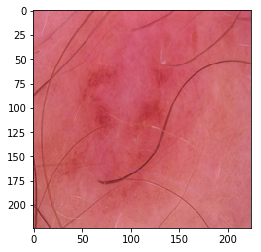

In [37]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

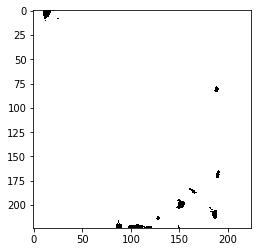

In [38]:
plt.imshow(thresh,cmap='gray')

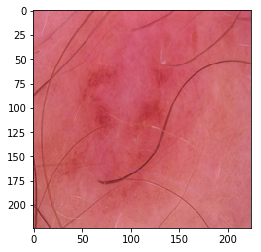

In [39]:
plt.imshow(final_img)